<a href="https://colab.research.google.com/github/swami-gait/Foundations_of_datascience/blob/master/FDS_WK11_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url,'data.json');

In [5]:
covid_data = pd.read_json('data.json')

In [6]:
covid_data.info

<bound method DataFrame.info of                                           states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
433  {'an': '49', 'ap': '8729', 'ar': '105', 'as': ...
434  {'an': '2', 'ap': '77', 'ar': '0', 'as': '6', ...
435  {'an': '96', 'ap': '10328', 'ar': '93', 'as': ...
436  {'an': '29', 'ap': '8516', 'ar': '35', 'as': '...
437  {'an': '2', 'ap': '72', 'ar': '0', 'as': '5', ...

[438 rows x 1 columns]>

In [7]:
import json

In [8]:
with open('data.json') as f:
    data = json.load(f)
data

{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl':

In [9]:
data = data['states_daily']

In [10]:
covid_data = pd.json_normalize(data)

In [11]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      438 non-null    object
 1   ap      438 non-null    object
 2   ar      438 non-null    object
 3   as      438 non-null    object
 4   br      438 non-null    object
 5   ch      438 non-null    object
 6   ct      438 non-null    object
 7   date    438 non-null    object
 8   dd      438 non-null    object
 9   dl      438 non-null    object
 10  dn      438 non-null    object
 11  ga      438 non-null    object
 12  gj      438 non-null    object
 13  hp      438 non-null    object
 14  hr      438 non-null    object
 15  jh      438 non-null    object
 16  jk      438 non-null    object
 17  ka      438 non-null    object
 18  kl      438 non-null    object
 19  la      438 non-null    object
 20  ld      438 non-null    object
 21  mh      438 non-null    object
 22  ml      438 non-null    ob

In [12]:
df = covid_data

In [13]:
df.date = pd.to_datetime(df.date)

In [14]:
df =df[df.status=='Confirmed']

In [15]:
df.drop('status',axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df.set_index('date',inplace=True)

In [17]:
df

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-02,98,8555,24,1178,2762,38,181,0,961,55,337,1101,69,761,455,444,5532,1169,4,0,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,52672,0,3873,146,2739
2020-08-03,96,7822,60,2371,2297,43,212,0,805,35,286,1009,115,654,941,590,4752,961,19,0,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,50488,0,4441,207,2716
2020-08-04,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2020-03-14 to 2020-08-06
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      146 non-null    object
 1   ap      146 non-null    object
 2   ar      146 non-null    object
 3   as      146 non-null    object
 4   br      146 non-null    object
 5   ch      146 non-null    object
 6   ct      146 non-null    object
 7   dd      146 non-null    object
 8   dl      146 non-null    object
 9   dn      146 non-null    object
 10  ga      146 non-null    object
 11  gj      146 non-null    object
 12  hp      146 non-null    object
 13  hr      146 non-null    object
 14  jh      146 non-null    object
 15  jk      146 non-null    object
 16  ka      146 non-null    object
 17  kl      146 non-null    object
 18  la      146 non-null    object
 19  ld      146 non-null    object
 20  mh      146 non-null    object
 21  ml      146 non-null    object
 22  mn     

In [19]:
df =df.apply(pd.to_numeric)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2020-03-14 to 2020-08-06
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      146 non-null    int64
 1   ap      146 non-null    int64
 2   ar      146 non-null    int64
 3   as      146 non-null    int64
 4   br      146 non-null    int64
 5   ch      146 non-null    int64
 6   ct      146 non-null    int64
 7   dd      146 non-null    int64
 8   dl      146 non-null    int64
 9   dn      146 non-null    int64
 10  ga      146 non-null    int64
 11  gj      146 non-null    int64
 12  hp      146 non-null    int64
 13  hr      146 non-null    int64
 14  jh      146 non-null    int64
 15  jk      146 non-null    int64
 16  ka      146 non-null    int64
 17  kl      146 non-null    int64
 18  la      146 non-null    int64
 19  ld      146 non-null    int64
 20  mh      146 non-null    int64
 21  ml      146 non-null    int64
 22  mn      146 non-null    int64
 

In [21]:
df.tail(7)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31,78,10376,107,1862,2986,35,336,0,1195,46,209,1153,58,711,915,490,5483,1310,26,0,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,57486,0,4422,118,2496
2020-08-01,88,9276,83,1457,3521,28,235,0,1118,45,280,1136,70,793,790,613,5172,1129,58,0,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,55117,0,3587,264,2589
2020-08-02,98,8555,24,1178,2762,38,181,0,961,55,337,1101,69,761,455,444,5532,1169,4,0,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,52672,0,3873,146,2739
2020-08-03,96,7822,60,2371,2297,43,212,0,805,35,286,1009,115,654,941,590,4752,961,19,0,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,50488,0,4441,207,2716
2020-08-04,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954


In [22]:
df =df.tail(7)

In [23]:
df.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,0,1195,46,209,1153,58,711,915,490,5483,1310,26,0,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,57486,0,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,0,1118,45,280,1136,70,793,790,613,5172,1129,58,0,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,55117,0,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,0,961,55,337,1101,69,761,455,444,5532,1169,4,0,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,52672,0,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,0,805,35,286,1009,115,654,941,590,4752,961,19,0,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,50488,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954


In [24]:
def colour_red_negative(x):
    color = 'red'if x<0 else'white'
    return 'color:'+ color

In [25]:
df.style.applymap(colour_red_negative)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,0,1195,46,209,1153,58,711,915,490,5483,1310,26,0,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,57486,0,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,0,1118,45,280,1136,70,793,790,613,5172,1129,58,0,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,55117,0,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,0,961,55,337,1101,69,761,455,444,5532,1169,4,0,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,52672,0,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,0,805,35,286,1009,115,654,941,590,4752,961,19,0,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,50488,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954


In [26]:
df.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,0,1195,46,209,1153,58,711,915,490,5483,1310,26,0,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,57486,0,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,0,1118,45,280,1136,70,793,790,613,5172,1129,58,0,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,55117,0,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,0,961,55,337,1101,69,761,455,444,5532,1169,4,0,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,52672,0,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,0,805,35,286,1009,115,654,941,590,4752,961,19,0,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,50488,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,0,674,43,259,1020,61,623,570,390,6259,1083,49,0,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,51282,0,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,0,1076,45,348,1073,37,752,978,559,5619,1195,58,0,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,56626,0,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,0,1299,43,191,1034,131,755,708,499,6805,1298,3,0,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,62170,0,4586,369,2954


In [27]:
df.drop(['dd','ld','un'],axis=1,inplace=True)

In [28]:
df.drop(['tt'],axis=1,inplace=True)

In [29]:
df.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [30]:
def bold_max_value(x):
    is_max = (x==x.max())
    return ['font-weight:bold' if y else '' for y in is_max]

In [31]:
df.style.apply(bold_max_value).highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [32]:
df.style.apply(bold_max_value).highlight_max(color='red',axis=1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [33]:
df.style.background_gradient(cmap='Reds')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [34]:
df.style.background_gradient(cmap='Reds',axis=1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [35]:
df.style.background_gradient(cmap='Reds',subset=['mh','tn','dl','ap','ka'])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [36]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [37]:
df.style.bar(['mh','tn','ap','dl','ka'])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-31 00:00:00,78,10376,107,1862,2986,35,336,1195,46,209,1153,58,711,915,490,5483,1310,26,10320,20,116,838,0,127,1499,663,174,1147,29,1986,5881,274,4422,118,2496
2020-08-01 00:00:00,88,9276,83,1457,3521,28,235,1118,45,280,1136,70,793,790,613,5172,1129,58,9601,33,135,808,5,138,1602,944,134,1160,11,2083,5879,252,3587,264,2589
2020-08-02 00:00:00,98,8555,24,1178,2762,38,181,961,55,337,1101,69,761,455,444,5532,1169,4,9509,18,75,921,57,104,1434,790,200,1167,8,1891,5875,141,3873,146,2739
2020-08-03 00:00:00,96,7822,60,2371,2297,43,212,805,35,286,1009,115,654,941,590,4752,961,19,8968,28,89,750,26,194,1384,674,176,1145,30,983,5609,0,4441,207,2716
2020-08-04 00:00:00,98,9747,32,2886,2464,46,382,674,43,259,1020,61,623,570,390,6259,1083,49,7760,15,98,797,6,276,1384,488,165,1124,95,1286,5063,131,2948,208,2752
2020-08-05 00:00:00,99,10128,65,2284,2701,64,295,1076,45,348,1073,37,752,978,559,5619,1195,58,10309,22,75,652,3,93,1337,841,286,1166,17,2012,5175,122,4078,246,2816
2020-08-06 00:00:00,96,10328,93,2372,3416,57,523,1299,43,191,1034,131,755,708,499,6805,1298,3,11514,51,124,830,33,82,1699,1035,188,1151,29,2092,5684,98,4586,369,2954


In [38]:
df[['mh','tn','dl','ka','ap']].style.bar()

,mh,tn,dl,ka,ap
date,,,,,
2020-07-31 00:00:00,10320,5881,1195,5483,10376
2020-08-01 00:00:00,9601,5879,1118,5172,9276
2020-08-02 00:00:00,9509,5875,961,5532,8555
2020-08-03 00:00:00,8968,5609,805,4752,7822
2020-08-04 00:00:00,7760,5063,674,6259,9747
2020-08-05 00:00:00,10309,5175,1076,5619,10128
2020-08-06 00:00:00,11514,5684,1299,6805,10328


In [39]:
df[['mh','tn','dl','ka','ap']].style.bar(subset=['mh'],color='red').bar(subset=['tn'],color='orange').bar(subset=['dl'],color='yellow').bar(subset=['ka'],color='brown').bar(subset=['ap'],color='maroon')

,mh,tn,dl,ka,ap
date,,,,,
2020-07-31 00:00:00,10320,5881,1195,5483,10376
2020-08-01 00:00:00,9601,5879,1118,5172,9276
2020-08-02 00:00:00,9509,5875,961,5532,8555
2020-08-03 00:00:00,8968,5609,805,4752,7822
2020-08-04 00:00:00,7760,5063,674,6259,9747
2020-08-05 00:00:00,10309,5175,1076,5619,10128
2020-08-06 00:00:00,11514,5684,1299,6805,10328


In [40]:
x =np.random.normal(size=1000)

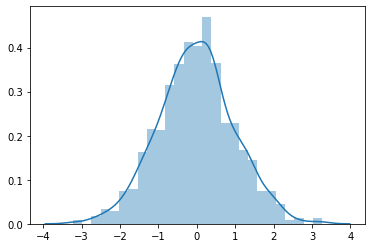

In [41]:
sns.distplot(x);

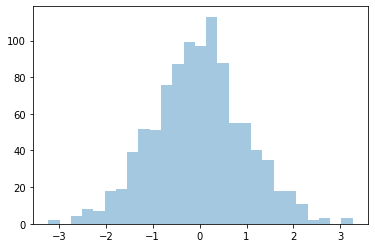

In [42]:
sns.distplot(x,kde=False);

In [43]:
sns.set(color_codes=True)

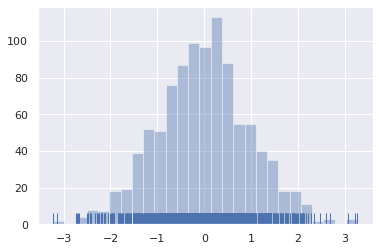

In [44]:
sns.distplot(x,kde=False,rug=True);

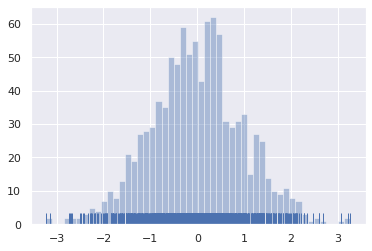

In [45]:
sns.distplot(x,kde=False,rug=True,bins=50);

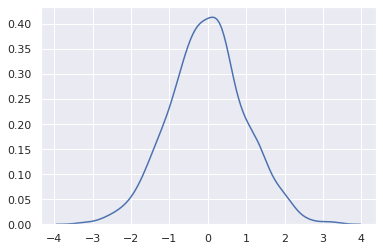

In [46]:
sns.kdeplot(x);

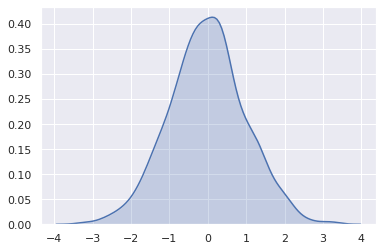

In [47]:
sns.kdeplot(x,shade=True);

In [48]:
y= np.random.uniform(size=1000)

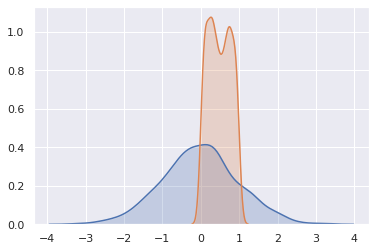

In [49]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [50]:
d=sns.load_dataset('diamonds')

In [51]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [52]:
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


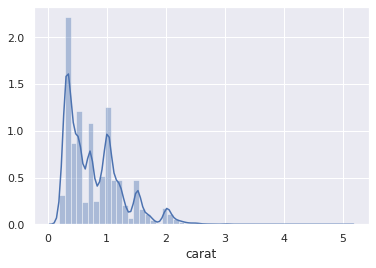

In [53]:
sns.distplot(d.carat);

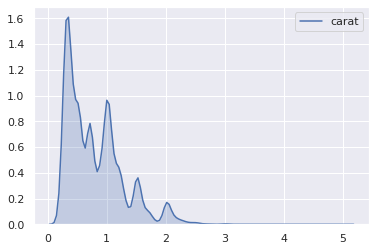

In [54]:
sns.kdeplot(d.carat,shade=True)

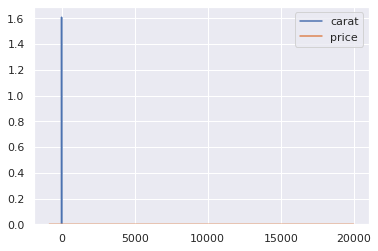

In [55]:
sns.kdeplot(d.carat,shade=True)
sns.kdeplot(d.price,shade=True);

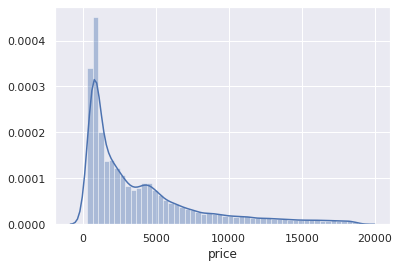

In [56]:
sns.distplot(d.price)

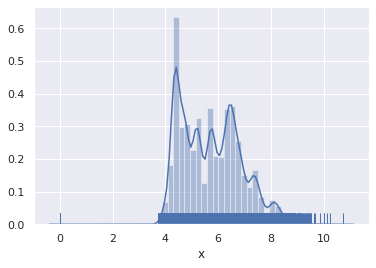

In [57]:
sns.distplot(d.x,rug=True);

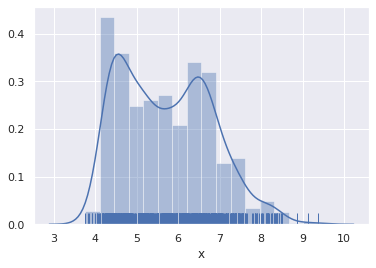

In [58]:
sns.distplot(d.sample(1000).x,rug=True);

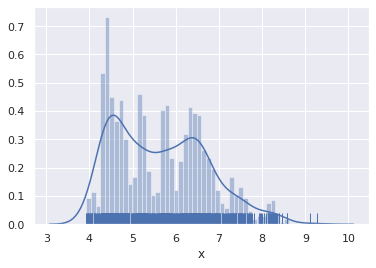

In [59]:
sns.distplot(d.sample(1000).x,rug=True,bins=50);

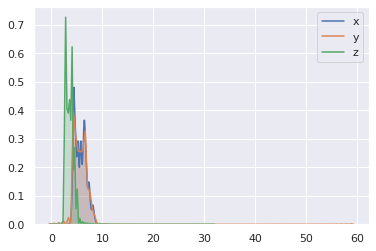

In [60]:
sns.kdeplot(d.x,shade=True)
sns.kdeplot(d.y,shade=True)
sns.kdeplot(d.z,shade=True);

In [61]:
x=np.random.normal(size=1000)

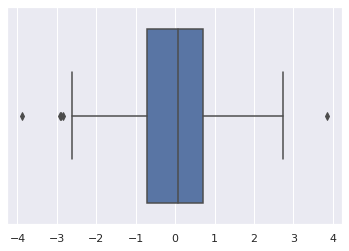

In [62]:
sns.boxplot(x);

In [63]:
x=np.random.uniform(size=1000)

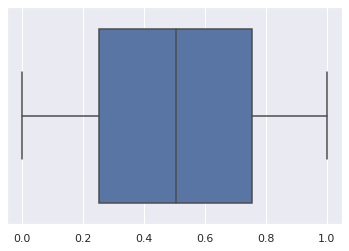

In [64]:
sns.boxplot(x);

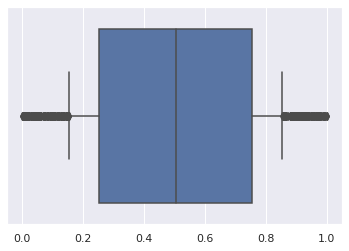

In [65]:
sns.boxplot(x,whis=0.2);

In [66]:
x=np.random.normal(size=1000)

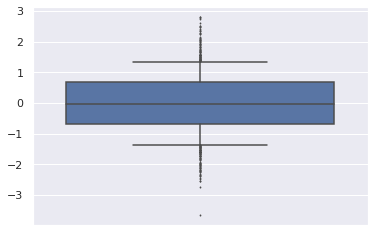

In [67]:
sns.boxplot(x,whis=0.5,fliersize=1,orient='v');

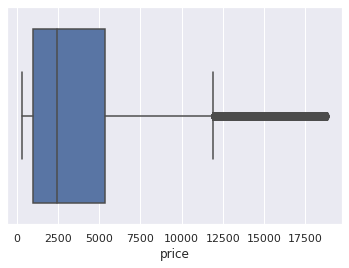

In [68]:
sns.boxplot(d.price)

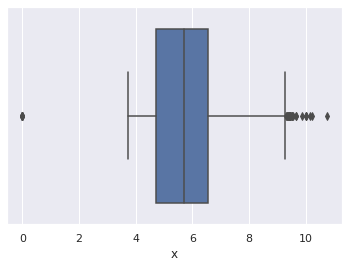

In [69]:
sns.boxplot(d.x);

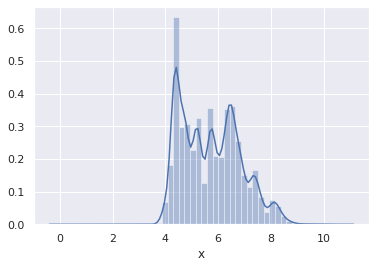

In [70]:
sns.distplot(d.x)

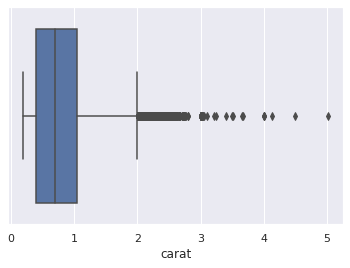

In [71]:
sns.boxplot(d.carat);

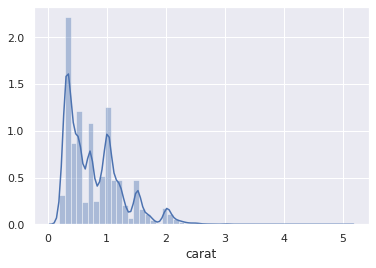

In [72]:
sns.distplot(d.carat);

In [73]:
d.groupby('cut').count()

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [75]:
c = d.groupby('cut')['cut'].count()

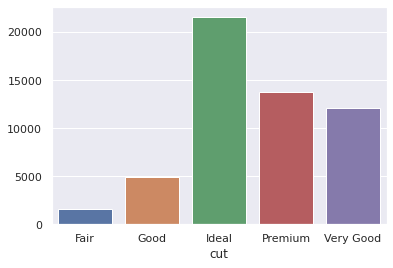

In [78]:
sns.barplot(c.index,c.values);

In [79]:
clare = d.groupby('clarity')['clarity'].count()

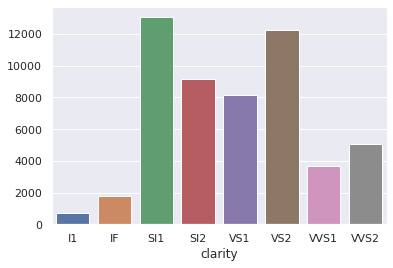

In [80]:
sns.barplot(clare.index,clare.values);

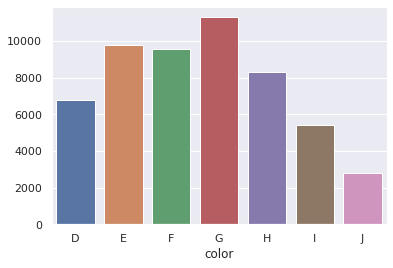

In [82]:
col = d.groupby('color')['color'].count()
sns.barplot(col.index,col.values);

In [83]:
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)

In [85]:
df = pd.DataFrame({'x':x,'y':y})

In [86]:
df

,x,y
0,1.299506,-1.200730
1,0.140523,-1.951754
2,0.235926,-0.043458
3,-0.233731,0.535791
4,-0.104839,0.905641
...,...,...
995,-0.204062,0.781537
996,-2.247835,1.569997
997,1.054541,0.340045
998,1.047570,-0.144723


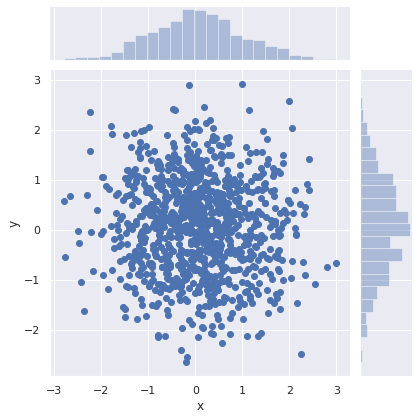

In [90]:
sns.jointplot('x','y',data=df);

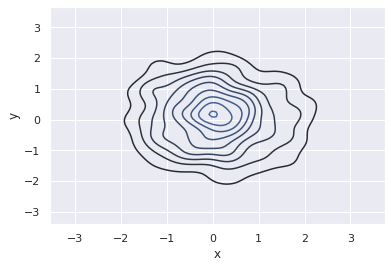

In [89]:
sns.kdeplot(df.x,df.y)

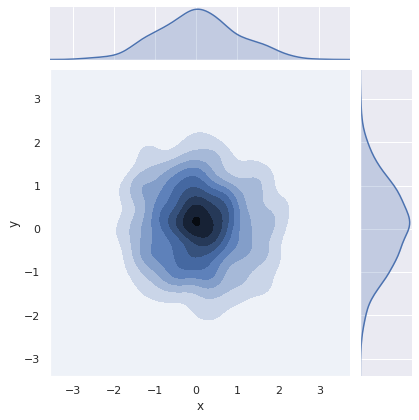

In [91]:
sns.jointplot('x','y',data=df,kind='kde');

In [95]:
x=np.random.normal(size=1000)
y=(3*x)+(np.random.normal(size=1000)/5)

In [96]:
df1 = pd.DataFrame({'x':x,'y':y})

In [97]:
df1

,x,y
0,-0.391650,-1.265977
1,-0.905104,-2.711410
2,-0.350206,-0.869397
3,1.685659,5.128662
4,-0.548690,-1.356564
...,...,...
995,-0.669227,-2.123349
996,-0.966706,-2.824013
997,0.571252,1.741559
998,0.168093,0.577113


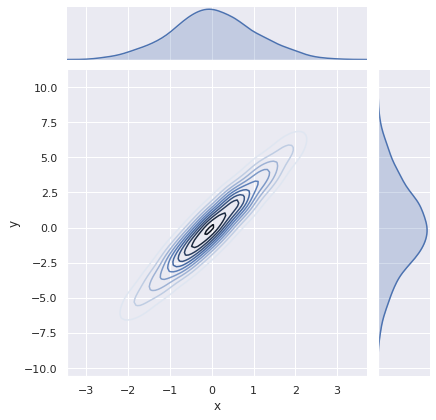

In [101]:
sns.jointplot('x','y',data=df1,kind='kde',shade=False);

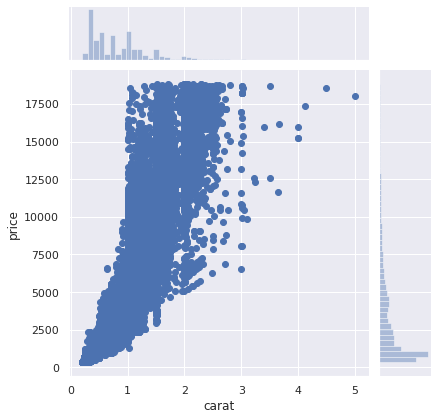

In [102]:
sns.jointplot('carat','price',data=d)

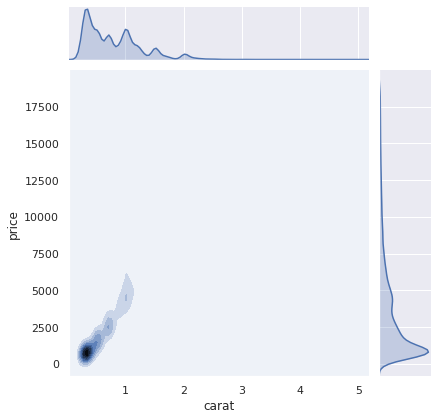

In [103]:
sns.jointplot('carat','price',data=d,kind='kde')

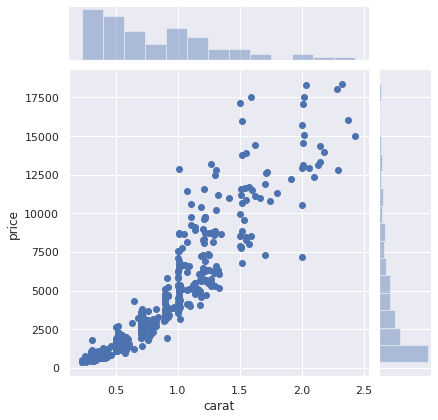

In [104]:
sns.jointplot('carat','price',data=d.sample(500));

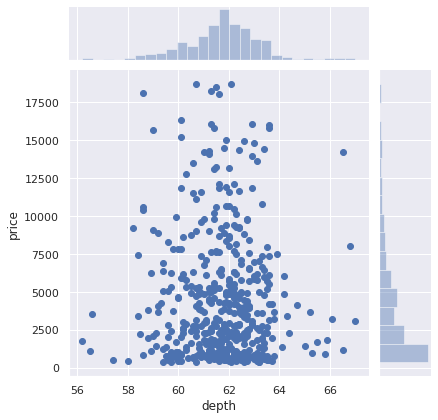

In [105]:
sns.jointplot('depth','price',data=d.sample(500));

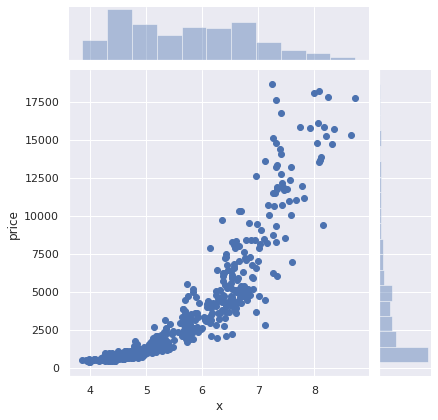

In [106]:
sns.jointplot('x','price',data=d.sample(500));

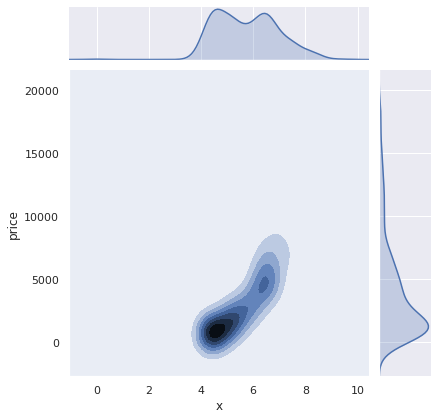

In [107]:
sns.jointplot('x','price',data=d.sample(500),kind='kde');

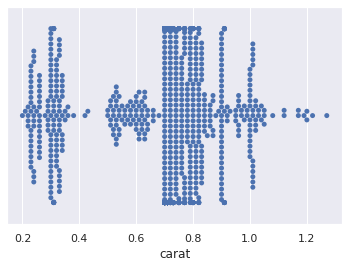

In [109]:
sns.swarmplot(d.head(1000).carat)

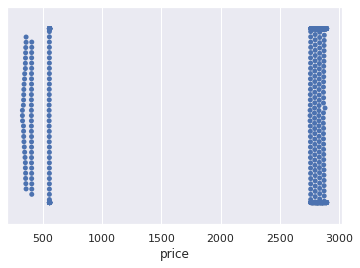

In [110]:
sns.swarmplot(d.head(1000).price)

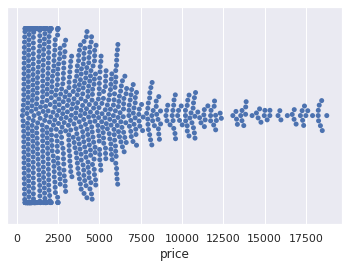

In [111]:
sns.swarmplot(d.sample(1000).price)

In [112]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


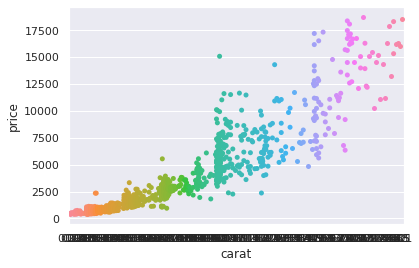

In [114]:
sns.swarmplot('carat','price',data =d.sample(1000));

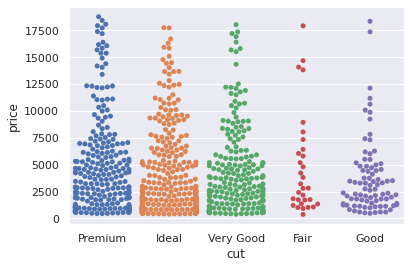

In [115]:
sns.swarmplot('cut','price',data =d.sample(1000));

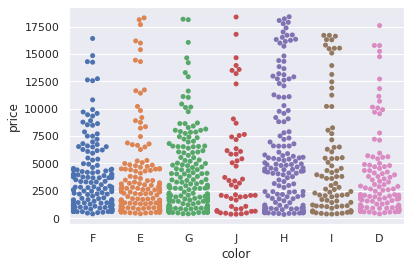

In [116]:
sns.swarmplot('color','price',data =d.sample(1000));

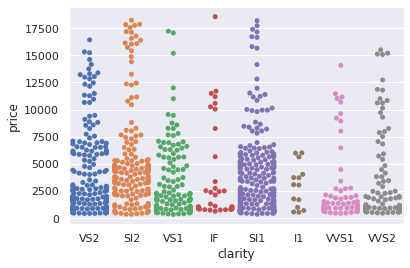

In [117]:
sns.swarmplot('clarity','price',data =d.sample(1000));

In [119]:
p=sns.load_dataset('penguins')

In [120]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [121]:
p

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [122]:
p.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


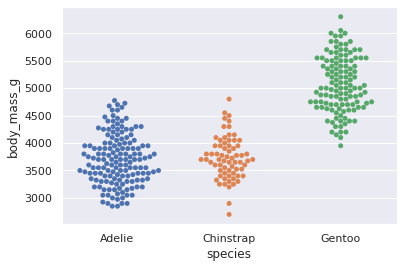

In [123]:
sns.swarmplot(x='species',y='body_mass_g',data=p)

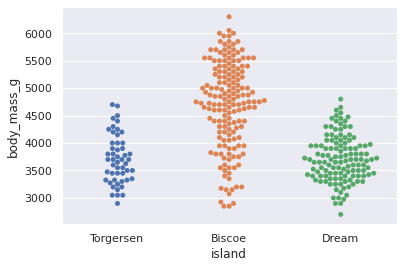

In [124]:
sns.swarmplot(x='island',y='body_mass_g',data=p)